<a href="https://www.kaggle.com/code/andy227/ml-study-chapter4?scriptVersionId=141601007" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-first-exercise/README.md
/kaggle/input/my-first-exercise/files/adult.data
/kaggle/input/my-first-exercise/files/ch02/educ_figdp_1_Data.csv
/kaggle/input/my-first-exercise/files/ch03/adult.data
/kaggle/input/my-first-exercise/files/ch07/educ_figdp_1_Data.csv
/kaggle/input/my-first-exercise/files/ch06/lmplotBostonLSTATorder3.png
/kaggle/input/my-first-exercise/files/ch06/dataX1.npy
/kaggle/input/my-first-exercise/files/ch06/IceExtentNormalizedByMonth.png
/kaggle/input/my-first-exercise/files/ch06/scatterplotBoston.png
/kaggle/input/my-first-exercise/files/ch06/IceExtentCleanedByMonth.png
/kaggle/input/my-first-exercise/files/ch06/lmplotBostonLSTAT.png
/kaggle/input/my-first-exercise/files/ch06/IceExtentLinearRegressionAllMonthsByYearPrediction.png
/kaggle/input/my-first-exercise/files/ch06/scatterLossWin.png
/kaggle/input/my-first-exercise/files/ch06/lmplotBostonLSTAT_order2.png
/kaggle/input/my-first-exercise/files/ch06/LogisticRegression.png
/kaggle/input/my-first-exer

# 数据表示与特征工程

> 用正确的方式表示数据，对监督模型性能的影响比所选择的精确参数还要大。

In [2]:
%matplotlib inline

In [3]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 18.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
from IPython.display import display

# 文件中没有包含列名称的表头，因此我们传入header=None
# 然后在"names"中显式地提供列名称
data = pd.read_csv(
"/kaggle/input/my-first-exercise/files/adult.data", header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income'])

# 为了便于说明，我们只选了其中几列
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]

# IPython.display可以在Jupyter notebook中输出漂亮的格式
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

# 提取 NumPy 数组
X = features.values
y = data_dummies['income_ >50K'].values

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Test score: 0.81


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 分箱、离散化、线性模型与树

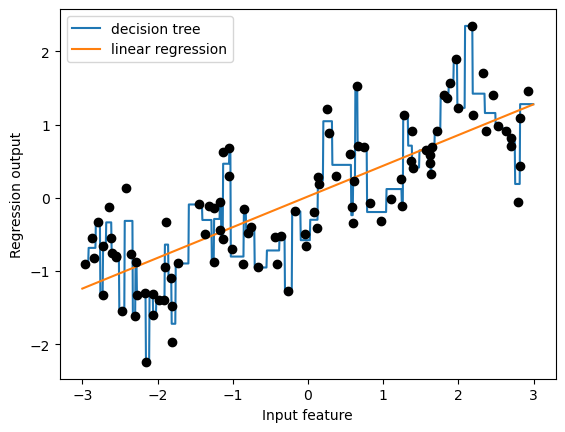

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)

plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [10]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [11]:
from sklearn.preprocessing import OneHotEncoder
# 使用OneHotEncoder进行变换
encoder = OneHotEncoder(sparse=False)
# encoder.fit找到which_bin中的唯一值
encoder.fit(which_bin)
# transform创建one-hot编码
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Text(0.5, 0, 'Input feature')

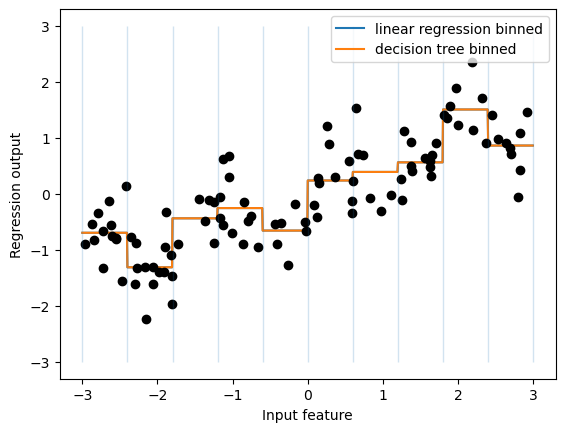

In [12]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

# 交互特征与多项式特征

In [13]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


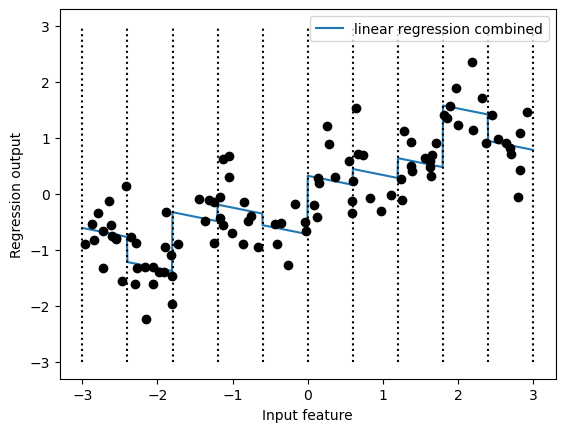

In [14]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [15]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


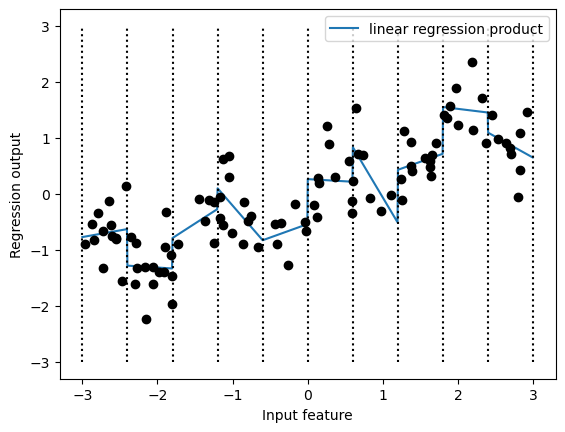

In [16]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [17]:
from sklearn.preprocessing import PolynomialFeatures
# 包含直到x ** 10的多项式:
# 默认的"include_bias=True"添加恒等于1的常数特征
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

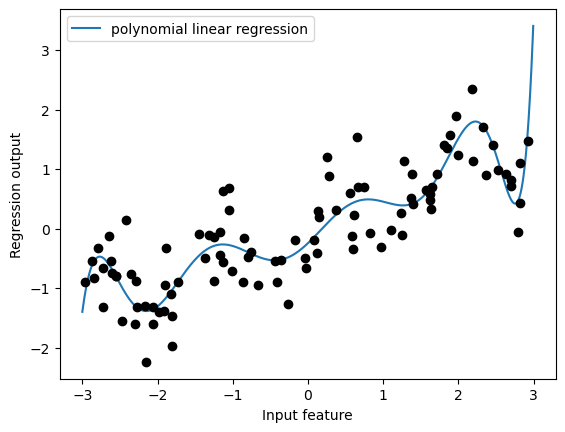

In [18]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

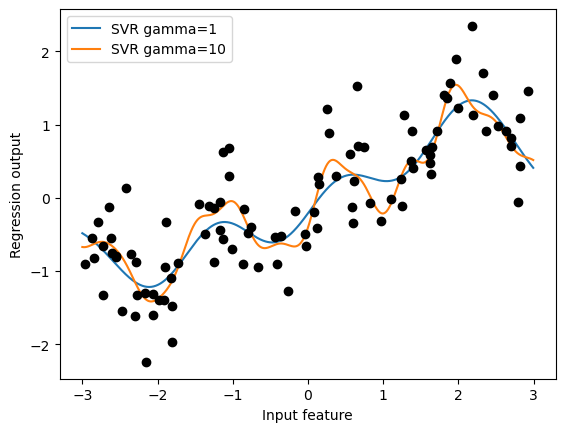

In [19]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

# 单变量非线性变换

In [20]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


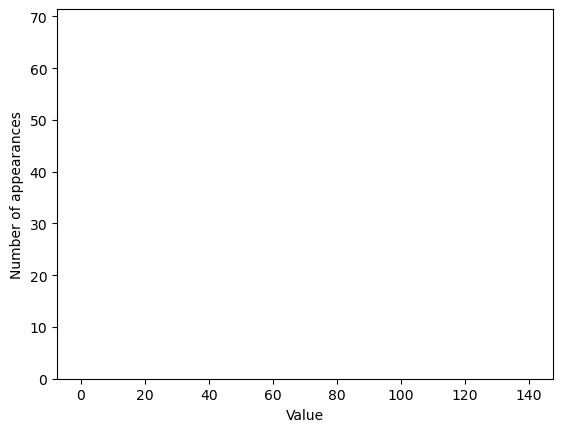

In [21]:
bins = np.bincount(X[:, 0])

plt.bar(range(len(bins)), bins, color='w')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

plt.show()

In [22]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


Text(0.5, 0, 'Value')

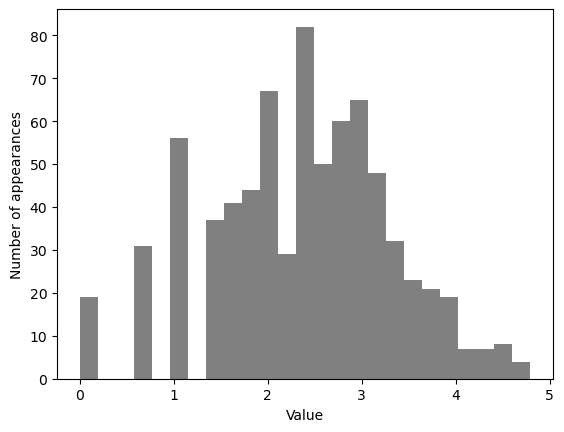

In [23]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [24]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


# 自动化特征选择
>在添
加新特征或处理一般的高维数据集时，最好将特征的数量减少到只包含最有用的那些特
征，并删除其余特征。这样会得到泛化能力更好、更简单的模型。但你如何判断每个特征
的作用有多大呢？有三种基本的策略：单变量统计 （univariate statistics）、基于模型的选
择 （model-based selection）和迭代选择 （iterative selection）。

## 单变量统计
> 在单变量统计中，我们计算每个特征和目标值之间的关系是否存在统计显著性，然后选择
具有最高置信度的特征。对于分类问题，这也被称为方差分析 （analysis of variance，
ANOVA）。这些测试的一个关键性质就是它们是单变量的 （univariate），即它们只单独
考虑每个特征。因此，如果一个特征只有在与另一个特征合并时才具有信息量，那么这个
特征将被舍弃。单变量测试的计算速度通常很快，并且不需要构建模型。

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 获得确定性的随机数
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 向数据中添加噪声特征
# 前30个特征来自数据集，后50个是噪声
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, 
                                                    cancer.target, random_state=0, test_size=.5)
# 使用f_classif（默认值）和SelectPercentile来选择50%的特征
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 对训练集进行变换
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

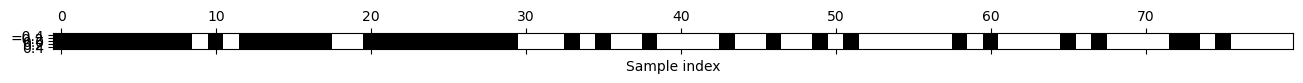

In [26]:
mask = select.get_support()
print(mask)
# 将遮罩可视化——黑色为True，白色为False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [27]:
from sklearn.linear_model import LogisticRegression
# 对测试数据进行变换
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Score with all features: 0.916
Score with only selected features: 0.919


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# 利用专家知识

In [28]:
citibike = mglearn.datasets.load_citibike()

/opt/conda/lib/python3.10/site-packages/mglearn/datasets.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_resampled = data_starttime.resample("3h").sum().fillna(0)


Text(0, 0.5, 'Rentals')

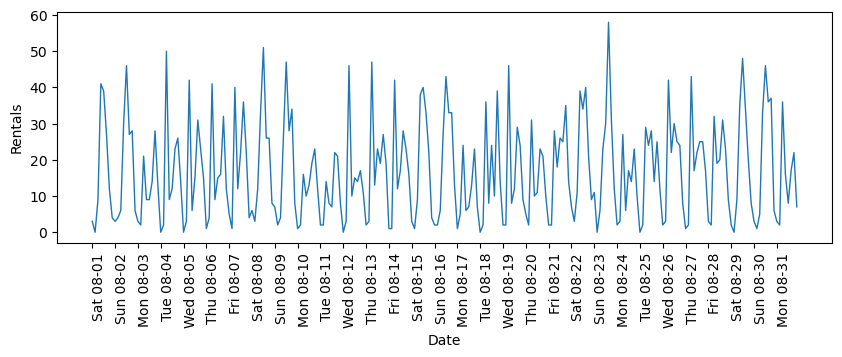

In [29]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")